## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
get_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
try:
    response = requests.get(get_url)
    data = response.text
except:
    print('URL not available')
else:
    print('loading data successfully')
    print(len(data))
    
# 用 request 傳送回來的資料不會認得斷行符號  
data[0:100]

loading data successfully
784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.split(split_tag)
print(len(data))

data[0] #可以看到中間\t還沒清掉

9996


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

In [4]:
# 串列分割後最後一行為空
data[9995]

#將最後一個data拿掉
data_nb = data[:-1] #取到倒數第二筆
print(len(data_nb))
data_nb[1]

9995


'n00015388_238\thttp://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'

In [5]:
# 字串還包含前面的序號及後面URL 要繼續切割
number = [] #序號
url = []

for i in range(len(data_nb)):
    ##使用\t切割
    new_list = data_nb[i].split('\t')
    number.append(new_list[0])
    url.append(new_list[1])
    
#number
url

import pandas as pd
data = {
    'number': number,
    'url': url
}
df = pd.DataFrame(data)
df.head(10)

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


## 將 txt 轉成 pandas dataframe

In [6]:
import pandas as pd
data = {
    'number': number,
    'url': url
}
df = pd.DataFrame(data)
df.head(10)

,number,url
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
5,n00015388_373,http://img172.imageshack.us/img172/4606/napo03...
6,n00015388_379,http://fotootjesvanannelies.web-log.nl/olifant...
7,n00015388_388,http://www.deweekkrant.nl/images/library/pictu...
8,n00015388_442,http://www.porschemania.it/discus/messages/815...
9,n00015388_474,http://farm1.static.flickr.com/72/225029238_80...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

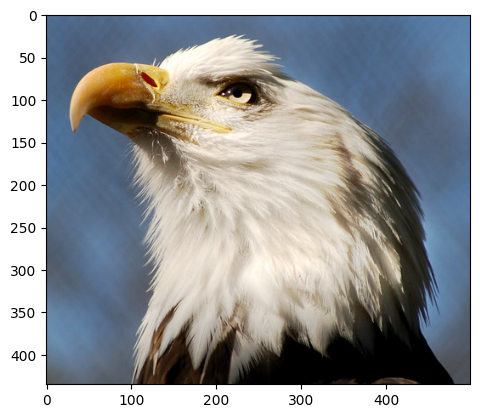

In [21]:
from PIL import Image  #PIL 影像處理套件 可以用來轉檔、調色、濾鏡、浮水印甚至創造圖片一堆的功能
                       #最簡單的轉檔方式，就是利用 PIL.Image 讀入格式A的檔案，然後以格式B儲存
from io import BytesIO #分成StringIO文件街口跟BytesIO直接在內存讀寫
import numpy as np     #支援大量維度的陣列與矩陣運算，也具備大量的數學與統計函式函式庫，進行科學運算和資料數據分析
import matplotlib.pyplot as plt

#請用 df.loc[...] 得到第一筆資料的連結
#用 column name 取資料的時候用 loc，用 index 取資料的時候用 iloc  loc() 含頭也含尾，iloc 含頭不含尾
first_link = df.loc[0,'url'] 

response = requests.get(first_link)           #使用request獲取資料
img = Image.open(BytesIO(response.content))   #Image.open是讀取圖片(二進制) 用BytesIO轉換為二進制

# Convert img to numpy array
img = np.array(img)       #將圖片轉成數組

#https://simplelearn.tw/matplotlib-intro/
#matplotlib.image 模組中的 imread() 方法讀取圖片
#讀取後使用 imshow() 在圖表中繪製圖片 最後透過 plt.show() 顯示圖表。
plt.imshow(img) 
plt.show()


In [20]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    return img_list

In [ ]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()